In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


# **Description**
    
##     **Context**

        The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

  ##  **Attribute information**

1. **Invoice id:** Computer generated sales slip invoice identification number
1. **Branch:** Branch of supercenter (3 branches are available identified by A, B and C).
1. **City:** Location of supercenters
1.  **Customer type:** 
        Type of customers, recorded by Members for customers using member card and Normal for without member card.
1.   **Gender:**  Gender type of customer
1.     **Product line:** General item categorization groups - 
            *             Electronic accessories, 
            *             Fashion accessories, 
            *             Food and beverages, 
            *             Health and beauty, 
            *             Home and lifestyle, 
            *             Sports and travel
1.     **Unit price:** Price of each product in dollor
1.     **Quantity:** Number of products purchased by customer
1.     **Tax:** 5'%' tax fee for customer buying
1.     **Total::** Total price including tax
1.     **Date:** Date of purchase (Record available from **January 2019 to March 2019**)
1.     **Time:** Purchase time **(10am to 9pm)**
1.     **Payment:** Payment used by customer for purchase 
    (3 methods are available – **Cash, Credit card and Ewallet**)
1.     **COGS**: Cost of goods sold
1.     **Gross margin percentage:** Gross margin percentage
1.     **Gross income:** Gross income
1.     **Rating**: Customer stratification rating on their overall shopping experience (**On a scale of 1 to 10**)

## **Acknowledgements**

    Thanks to all who take time and energy to perform Kernels with this dataset and reviewers.

## **Purpose**

    This dataset can be used for predictive data analytics purpose.

**Part-1:**
​
1. *     Complete all the basic exploratory steps.
**Part-2:**
​
1. *     Is your supermarket more popular with males or females? 
1. *     What does the customer rating look like and can you also comment on its skewness? 
1. *     What can you say about the aggregate sales across the branches? 
1. *     Which is the most popular payment method used by customers?
**Part-3:**
​
1. *     Does gross income affect customer ratings? 
1. *     Which is the most profitable branch? 
1. *     How is the relationship between Gender and Gross income? 
1. *     Can you see any time trend in gross income? 
1. *     Which product line helps you generate the most income? 
1. *     What is the spending pattern of both males and females, meaning in which category do they spend more? 
1. *     How many products are bought by customers? 
1. *     Which day of the week has maximum sales? 
1. *     Which hour of the day is busiest? 
1. *     Which product line should your supermarket focus on? 
1. *     Which city should be chosen for expansion and what products should be focussed on?

In [2]:
df =pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')
print('\n')
print("Number of row and columns in df","-"*80)
display(df.shape)
print('\n')
print('\n')
print("First five row of df","-"*80)
display(df.head().T)
print('\n')
print('\n')
print("Last five row of df","-"*80)
display(df.tail().T)
print('\n')
print('\n')
print("data type  of each values in df","-"*80)
display(df.dtypes)
print('\n')
print('\n')
print("Null values in df","-"*80)
display(df.isnull().sum())
print('\n')



Number of row and columns in df --------------------------------------------------------------------------------


(1000, 17)





First five row of df --------------------------------------------------------------------------------


,0,1,2,3,4
Invoice ID,750-67-8428,226-31-3081,631-41-3108,123-19-1176,373-73-7910
Branch,A,C,A,A,A
City,Yangon,Naypyitaw,Yangon,Yangon,Yangon
Customer type,Member,Normal,Normal,Member,Normal
Gender,Female,Female,Male,Male,Male
Product line,Health and beauty,Electronic accessories,Home and lifestyle,Health and beauty,Sports and travel
Unit price,74.69,15.28,46.33,58.22,86.31
Quantity,7,5,7,8,7
Tax 5%,26.1415,3.82,16.2155,23.288,30.2085
Total,548.9715,80.22,340.5255,489.048,634.3785






Last five row of df --------------------------------------------------------------------------------


,995,996,997,998,999
Invoice ID,233-67-5758,303-96-2227,727-02-1313,347-56-2442,849-09-3807
Branch,C,B,A,A,A
City,Naypyitaw,Mandalay,Yangon,Yangon,Yangon
Customer type,Normal,Normal,Member,Normal,Member
Gender,Male,Female,Male,Male,Female
Product line,Health and beauty,Home and lifestyle,Food and beverages,Home and lifestyle,Fashion accessories
Unit price,40.35,97.38,31.84,65.82,88.34
Quantity,1,10,1,1,7
Tax 5%,2.0175,48.69,1.592,3.291,30.919
Total,42.3675,1022.49,33.432,69.111,649.299






data type  of each values in df --------------------------------------------------------------------------------


Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object





Null values in df --------------------------------------------------------------------------------


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# Is your supermarket more popular with males or females?

<AxesSubplot:>

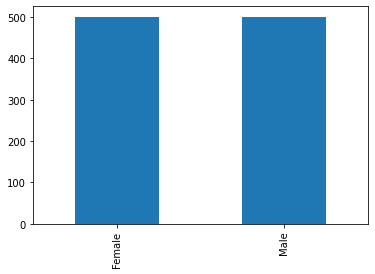

In [3]:
df.Gender.value_counts().plot(kind="bar")

In [4]:
df.Rating.nunique()

61

In [5]:
df.groupby('Gender')['Rating'].mean()

Gender
Female    6.964471
Male      6.980962
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Density'>

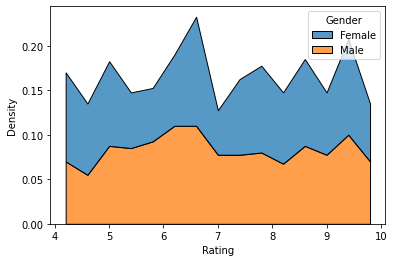

In [6]:
sns.histplot(data=df, x="Rating", hue="Gender", multiple="stack",element="poly",stat="density",bins=15)

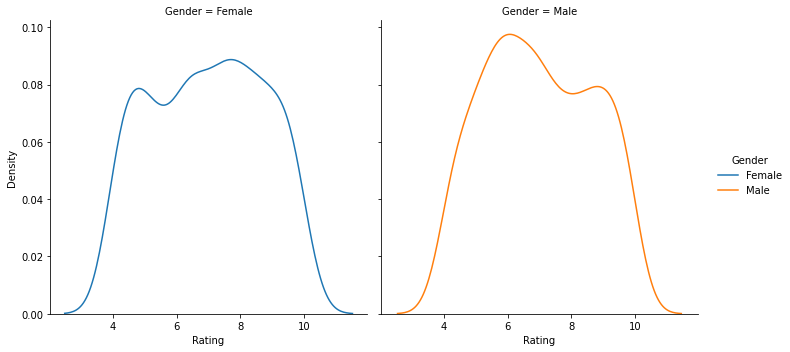

In [7]:
sns.displot(data=df, x="Rating", hue="Gender", col="Gender", kind="kde")

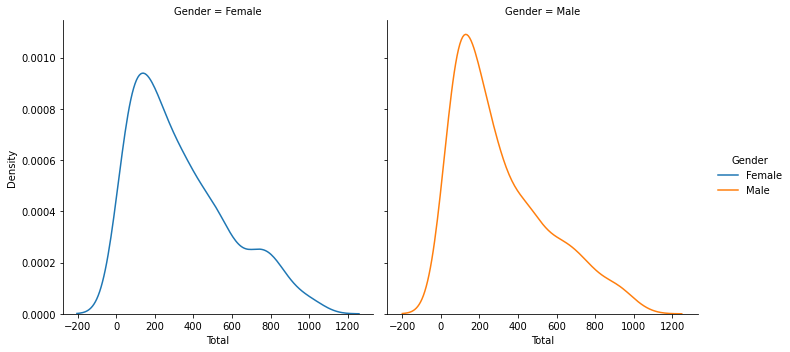

In [8]:
sns.displot(data=df, x="Total", hue="Gender", col="Gender", kind="kde")

In [9]:
df.groupby('Rating')['Gender'].value_counts()

Rating  Gender
4.0     Female     6
        Male       5
4.1     Female    13
        Male       4
4.2     Female    14
                  ..
9.8     Female     7
9.9     Female     8
        Male       8
10.0    Female     4
        Male       1
Name: Gender, Length: 122, dtype: int64

# What does the customer rating look like and can you also comment on its skewness?

<AxesSubplot:xlabel='Rating', ylabel='Count'>

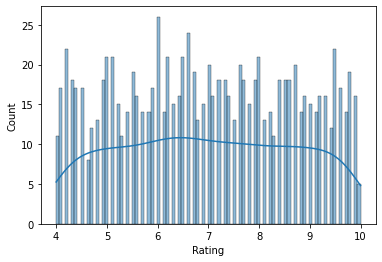

In [10]:
sns.histplot(data=df, x="Rating",kde=True,bins=100)

In [11]:
df.Rating.skew()

0.00900964876573073

# What can you say about the aggregate sales across the branches?

<AxesSubplot:xlabel='Branch'>

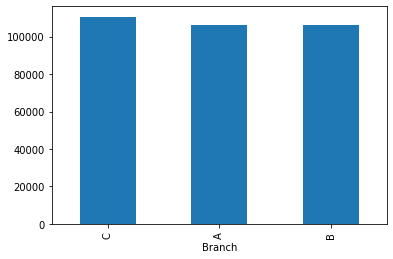

In [12]:
df.groupby('Branch')['Total'].agg('sum').nlargest().round().plot(kind='bar')

# Which is the most popular payment method used by customers?

<AxesSubplot:>

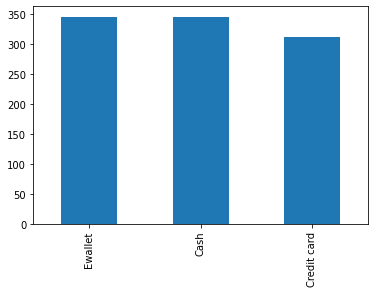

In [13]:
df.Payment.value_counts().plot(kind='bar')

# Does gross income affect customer ratings?

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

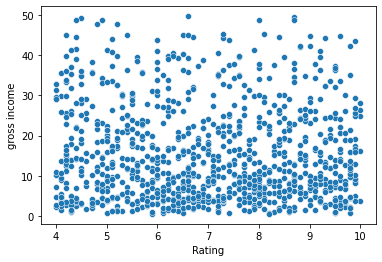

In [14]:
sns.scatterplot(data=df, y="gross income", x="Rating", ci=None)

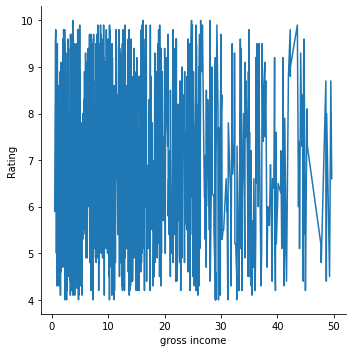

In [15]:
sns.relplot(y="Rating", x="gross income", kind="line", data=df, ci=None);

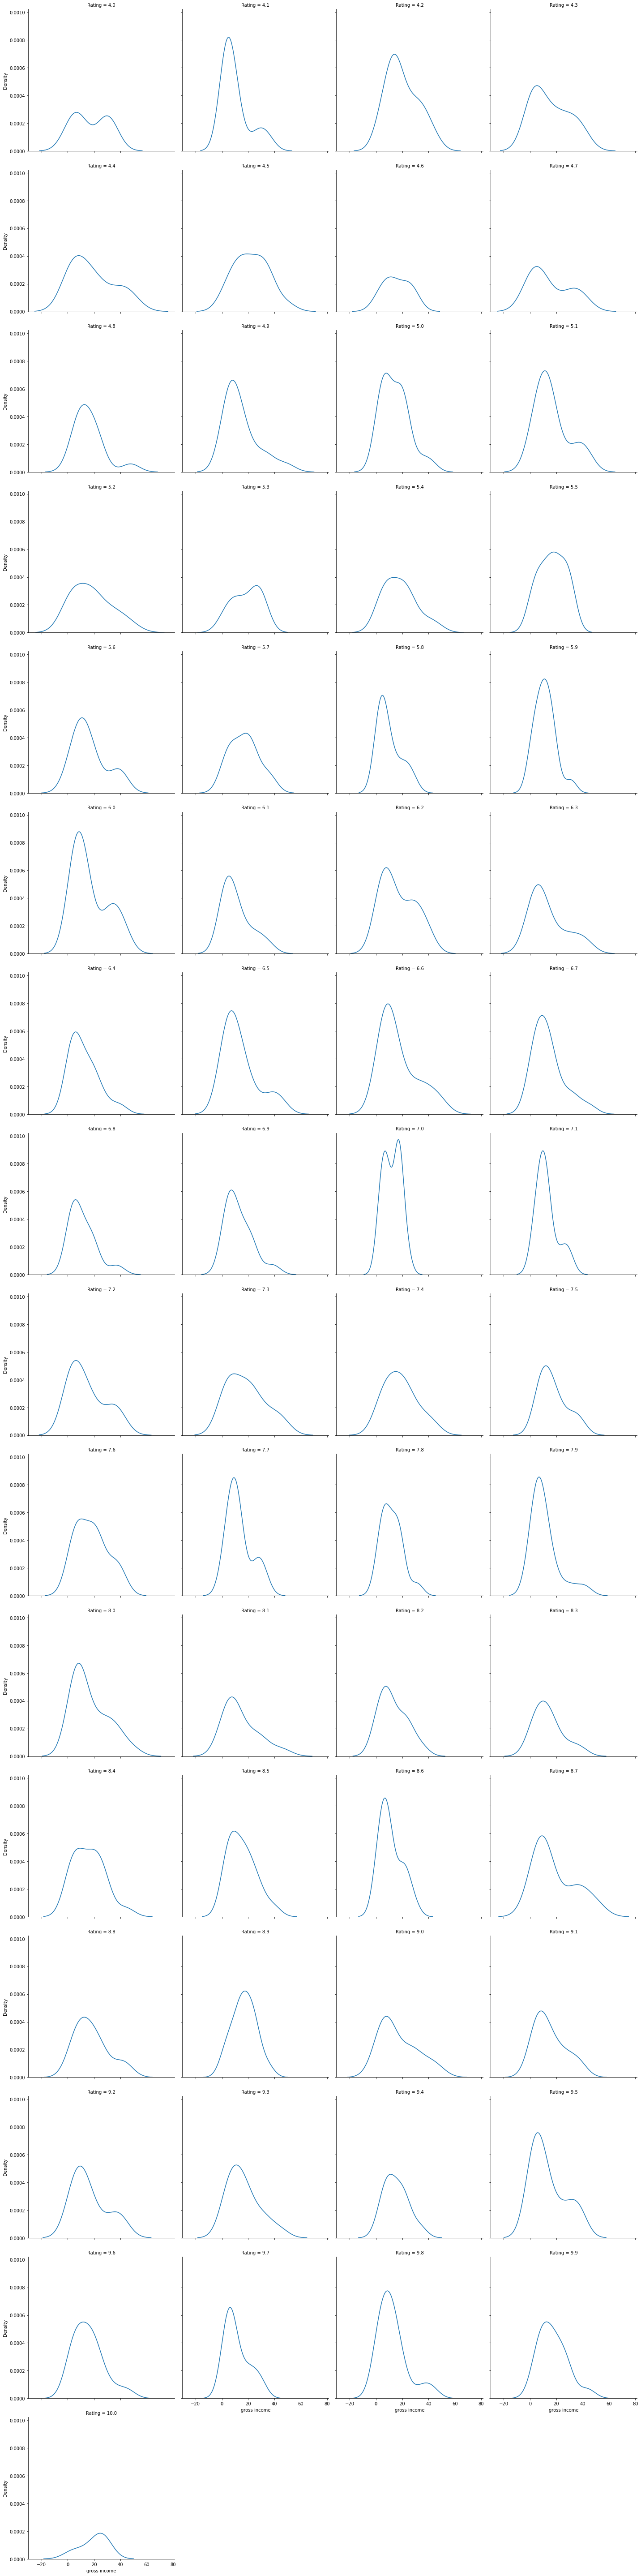

In [16]:
sns.displot(data=df, x="gross income", col="Rating", kind="kde", col_wrap=4)